# 🛍️ Customer Spend Analysis using Hierarchical Clustering

## What is Hierarchical Clustering?

**Hierarchical Clustering** is an unsupervised machine learning technique that groups similar data points into clusters. Unlike other clustering methods (like K-Means), it creates a **tree-like structure (dendrogram)** showing how clusters are formed step by step.

### Why Use It for Customer Segmentation?

- 📊 **Visual Understanding**: Dendrograms help us see customer relationships clearly
- 🎯 **Marketing Strategy**: Group customers with similar behavior for targeted campaigns
- 💰 **Revenue Optimization**: Identify high-value customer segments
- 🔍 **Pattern Discovery**: Find hidden patterns in customer spending habits

### What We'll Learn:
1. How to load and explore customer data
2. How to visualize data distributions
3. How to apply Hierarchical Clustering
4. How to interpret dendrograms
5. How to segment customers and derive business insights

---
## 📚 Step 1: Import Required Libraries

Let's import all the Python libraries we'll need for this analysis.

In [1]:
# Data manipulation and analysis
import pandas as pd  # For working with dataframes (tables)
import numpy as np   # For numerical operations

# Data visualization
import matplotlib.pyplot as plt  # Basic plotting library
import seaborn as sns           # Advanced statistical visualizations
from mpl_toolkits.mplot3d import Axes3D  # For 3D plots

# Hierarchical Clustering libraries
from scipy.cluster.hierarchy import dendrogram, linkage  # For creating dendrograms
from sklearn.cluster import AgglomerativeClustering      # The clustering algorithm
from sklearn.preprocessing import StandardScaler         # For scaling features

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Set visualization style for better-looking plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)  # Default figure size

print("✅ All libraries imported successfully!")

✅ All libraries imported successfully!


---
## 📂 Step 2: Load and Explore the Dataset

Let's load our customer data and understand what we're working with.

In [2]:
# Load the dataset from CSV file
df = pd.read_csv('dataset.csv')

print("📊 Dataset loaded successfully!")
print(f"\n🔢 Total number of customers: {len(df)}")
print(f"📋 Number of features: {df.shape[1]}")
print("\n" + "="*80)
print("👀 First 10 rows of the dataset:")
print("="*80)
df.head(10)

📊 Dataset loaded successfully!

🔢 Total number of customers: 200
📋 Number of features: 5

👀 First 10 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [3]:
# Display last 5 rows to see the end of the dataset
print("\n" + "="*80)
print("👀 Last 5 rows of the dataset:")
print("="*80)
df.tail()


👀 Last 5 rows of the dataset:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [4]:
# Get detailed information about the dataset
print("\n" + "="*80)
print("ℹ️  Dataset Information:")
print("="*80)
df.info()


ℹ️  Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          200 non-null    int64 
 1   Gender              200 non-null    object
 2   Age                 200 non-null    int64 
 3   Annual Income (k$)  200 non-null    int64 
 4   Spending Score      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Statistical summary of numerical features
print("\n" + "="*80)
print("📈 Statistical Summary:")
print("="*80)
df.describe()


📈 Statistical Summary:


,CustomerID,Age,Annual Income (k$),Spending Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
# Check for missing values
print("\n" + "="*80)
print("🔍 Checking for Missing Values:")
print("="*80)
missing_values = df.isnull().sum()
print(missing_values)

if missing_values.sum() == 0:
    print("\n✅ Great! No missing values found.")
else:
    print("\n⚠️  Warning: Missing values detected!")


🔍 Checking for Missing Values:
CustomerID            0
Gender                0
Age                   0
Annual Income (k$)    0
Spending Score        0
dtype: int64

✅ Great! No missing values found.


In [7]:
# Check for duplicate rows
print("\n" + "="*80)
print("🔍 Checking for Duplicate Rows:")
print("="*80)
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates == 0:
    print("✅ No duplicate rows found.")
else:
    print(f"⚠️  {duplicates} duplicate rows found!")


🔍 Checking for Duplicate Rows:
Number of duplicate rows: 0
✅ No duplicate rows found.


In [8]:
# Check unique values in Gender column
print("\n" + "="*80)
print("👥 Gender Distribution:")
print("="*80)
print(df['Gender'].value_counts())
print(f"\nMales: {df[df['Gender']=='Male'].shape[0]}")
print(f"Females: {df[df['Gender']=='Female'].shape[0]}")


👥 Gender Distribution:
Gender
Female    112
Male       88
Name: count, dtype: int64

Males: 88
Females: 112


---
## 📊 Step 3: Data Visualization - Understanding Distributions

Let's visualize our data to understand the patterns better.

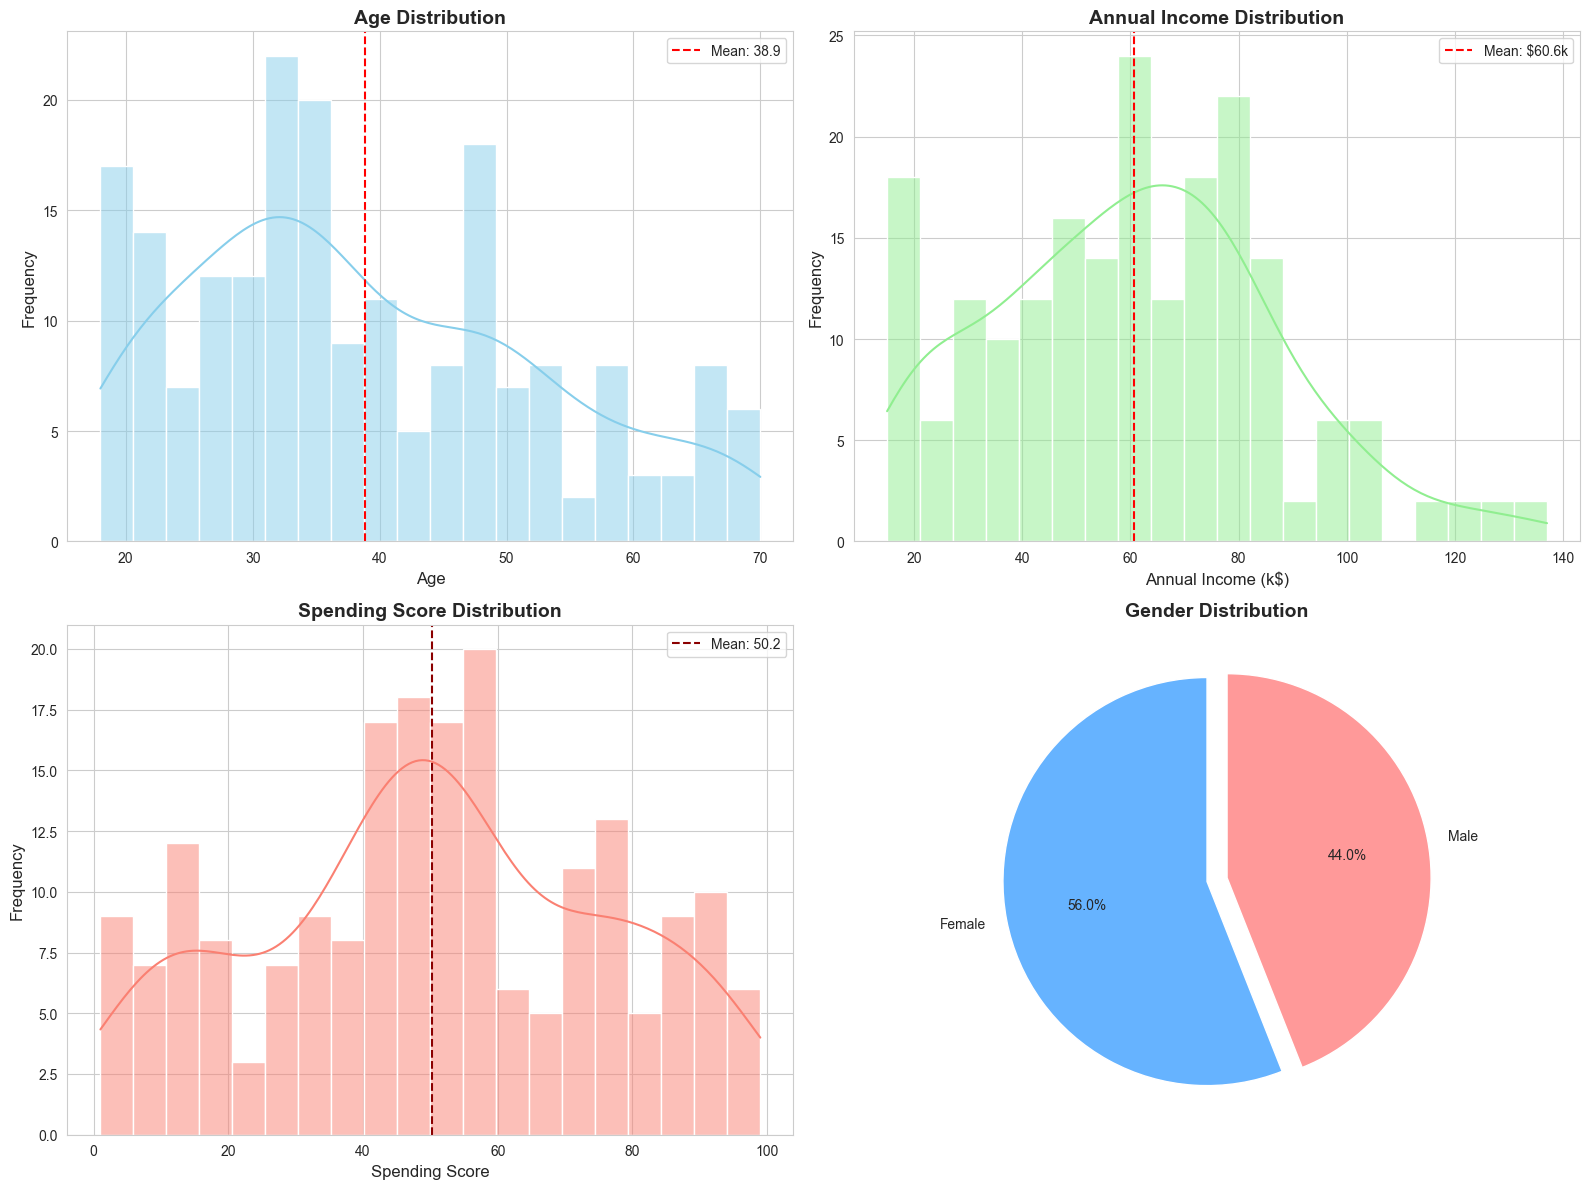


📊 Key Observations:
   • Average Age: 38.9 years
   • Average Income: $60.6k
   • Average Spending Score: 50.2


In [9]:
# Create distribution plots for numerical features
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Age Distribution
sns.histplot(df['Age'], bins=20, kde=True, color='skyblue', ax=axes[0, 0])
axes[0, 0].set_title('Age Distribution', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Age', fontsize=12)
axes[0, 0].set_ylabel('Frequency', fontsize=12)
axes[0, 0].axvline(df['Age'].mean(), color='red', linestyle='--', label=f'Mean: {df["Age"].mean():.1f}')
axes[0, 0].legend()

# Annual Income Distribution
sns.histplot(df['Annual Income (k$)'], bins=20, kde=True, color='lightgreen', ax=axes[0, 1])
axes[0, 1].set_title('Annual Income Distribution', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Annual Income (k$)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)
axes[0, 1].axvline(df['Annual Income (k$)'].mean(), color='red', linestyle='--', 
                   label=f'Mean: ${df["Annual Income (k$)"].mean():.1f}k')
axes[0, 1].legend()

# Spending Score Distribution
sns.histplot(df['Spending Score'], bins=20, kde=True, color='salmon', ax=axes[1, 0])
axes[1, 0].set_title('Spending Score Distribution', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Spending Score', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].axvline(df['Spending Score'].mean(), color='darkred', linestyle='--', 
                   label=f'Mean: {df["Spending Score"].mean():.1f}')
axes[1, 0].legend()

# Gender Distribution (Pie Chart)
gender_counts = df['Gender'].value_counts()
colors = ['#66b3ff', '#ff9999']
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', 
               startangle=90, colors=colors, explode=(0.05, 0.05))
axes[1, 1].set_title('Gender Distribution', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print(f"   • Average Age: {df['Age'].mean():.1f} years")
print(f"   • Average Income: ${df['Annual Income (k$)'].mean():.1f}k")
print(f"   • Average Spending Score: {df['Spending Score'].mean():.1f}")

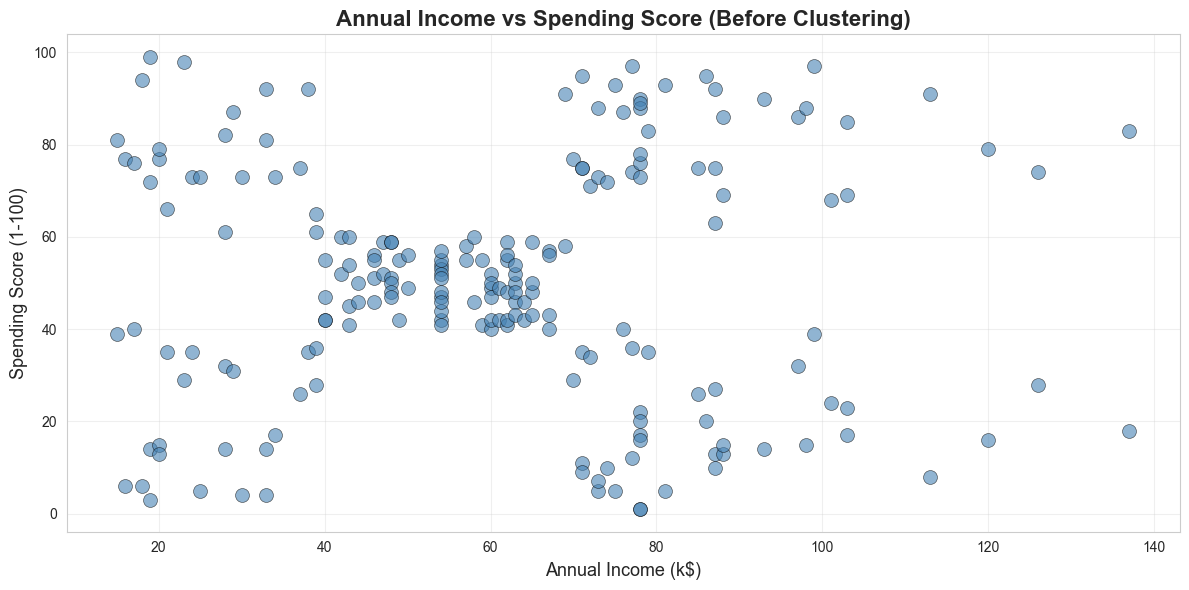


💡 Notice: Can you spot potential customer groups in this plot?
   Hierarchical clustering will help us identify these groups automatically!


In [10]:
# Scatter plot: Annual Income vs Spending Score
plt.figure(figsize=(12, 6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score'], 
            c='steelblue', alpha=0.6, s=100, edgecolors='black', linewidth=0.5)
plt.title('Annual Income vs Spending Score (Before Clustering)', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=13)
plt.ylabel('Spending Score (1-100)', fontsize=13)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Notice: Can you spot potential customer groups in this plot?")
print("   Hierarchical clustering will help us identify these groups automatically!")

---
## 🔧 Step 4: Data Preprocessing

Before applying clustering, we need to prepare our data.

In [11]:
# Select features for clustering
# We'll use Annual Income and Spending Score as the main features
# These two features are most relevant for customer segmentation

X = df[['Annual Income (k$)', 'Spending Score']].values

print("✅ Selected Features for Clustering:")
print("   1. Annual Income (k$)")
print("   2. Spending Score")
print(f"\n📊 Shape of feature matrix: {X.shape}")
print("   (200 customers × 2 features)")

✅ Selected Features for Clustering:
   1. Annual Income (k$)
   2. Spending Score

📊 Shape of feature matrix: (200, 2)
   (200 customers × 2 features)


In [12]:
# Feature Scaling
# Why? Hierarchical clustering uses distance metrics, so we need to scale
# features to the same range to avoid bias toward larger values

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("✅ Feature Scaling Complete!")
print("\n📊 Before Scaling (first 5 customers):")
print(X[:5])
print("\n📊 After Scaling (first 5 customers):")
print(X_scaled[:5])
print("\n💡 Note: Scaled values have mean=0 and standard deviation=1")

✅ Feature Scaling Complete!

📊 Before Scaling (first 5 customers):
[[15 39]
 [15 81]
 [16  6]
 [16 77]
 [17 40]]

📊 After Scaling (first 5 customers):
[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]]

💡 Note: Scaled values have mean=0 and standard deviation=1


---
## 🌳 Step 5: Create Dendrogram to Find Optimal Clusters

A **dendrogram** is a tree diagram that shows how clusters are merged step by step.

### How to Read a Dendrogram:
- **Y-axis**: Distance between clusters (larger = more different)
- **X-axis**: Individual data points (customers)
- **Vertical lines**: Show when clusters merge
- **Horizontal cut**: Determines number of clusters

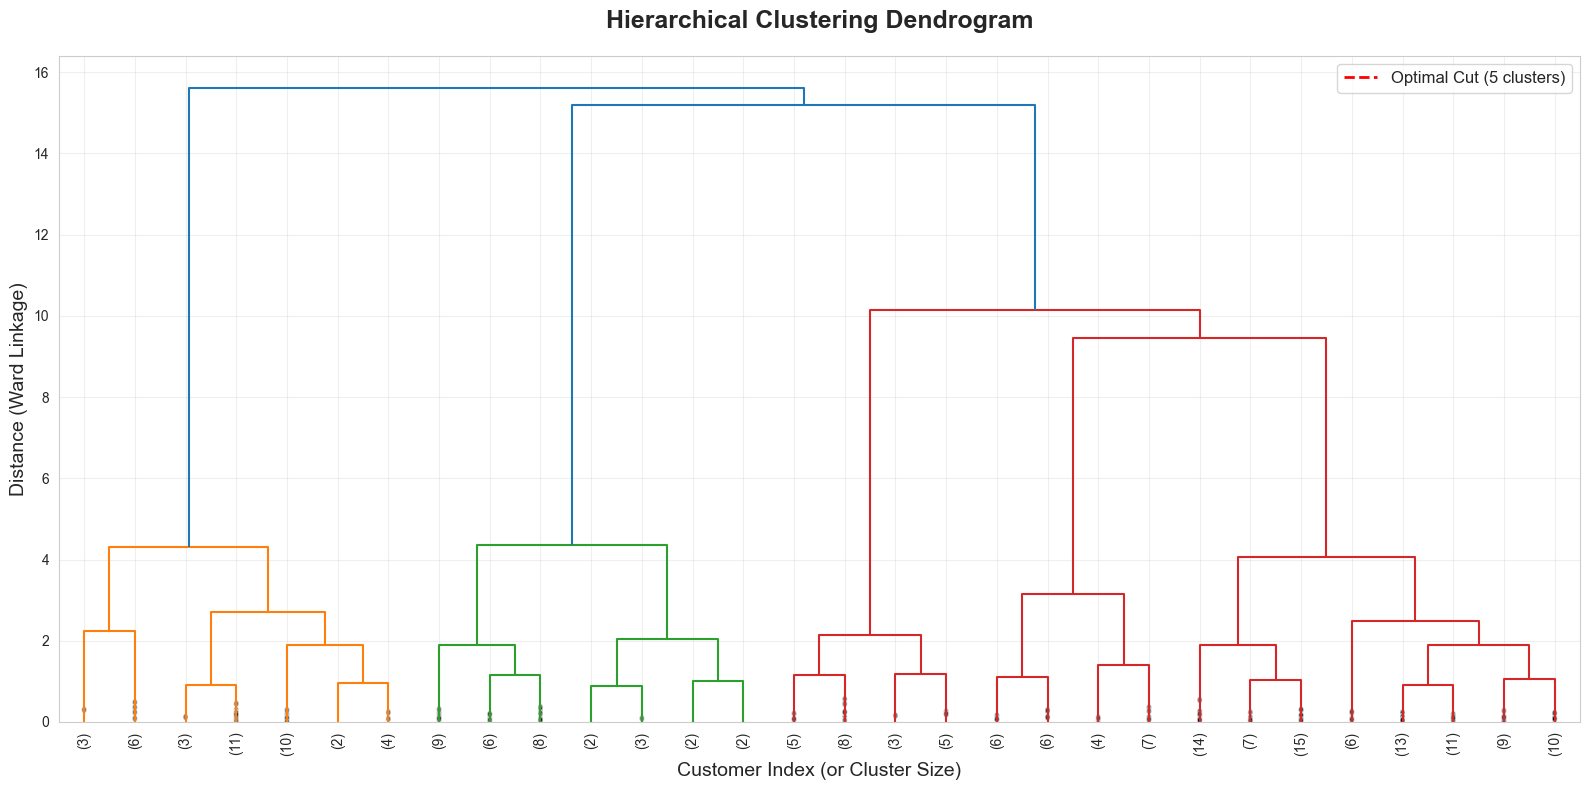


🌳 Dendrogram Interpretation:
   • The red dashed line suggests cutting at 5 clusters
   • This is determined by finding the longest vertical distance
   • 5 clusters will give us meaningful customer segments


In [13]:
# Create linkage matrix using Ward's method
# Ward's method minimizes the variance within clusters
linkage_matrix = linkage(X_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(16, 8))
dendrogram(linkage_matrix, 
           truncate_mode='lastp',  # Show only the last p merged clusters
           p=30,  # Show last 30 merges
           leaf_rotation=90,
           leaf_font_size=10,
           show_contracted=True)

plt.title('Hierarchical Clustering Dendrogram', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Customer Index (or Cluster Size)', fontsize=14)
plt.ylabel('Distance (Ward Linkage)', fontsize=14)
plt.axhline(y=150, color='red', linestyle='--', linewidth=2, label='Optimal Cut (5 clusters)')
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n🌳 Dendrogram Interpretation:")
print("   • The red dashed line suggests cutting at 5 clusters")
print("   • This is determined by finding the longest vertical distance")
print("   • 5 clusters will give us meaningful customer segments")

---
## 🎯 Step 6: Apply Hierarchical Clustering

Now let's apply Agglomerative Clustering with 5 clusters based on our dendrogram analysis.

In [15]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Hierarchical Clustering
n_clusters = 5  # Based on dendrogram analysis

hc = AgglomerativeClustering(
    n_clusters=n_clusters,
    metric='euclidean',   # Instead of affinity
    linkage='ward'
)

# Predict cluster labels
y_pred = hc.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = y_pred

print("✅ Hierarchical Clustering Complete!")
print(f"\n📊 Number of clusters: {n_clusters}")
print("\n👥 Customers per cluster:")
print(df['Cluster'].value_counts().sort_index())

# Display first few rows with cluster assignments
print("\n" + "="*80)
print("Sample customers with their assigned clusters:")
print("="*80)
df[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score', 'Cluster']].head(10)


✅ Hierarchical Clustering Complete!

📊 Number of clusters: 5

👥 Customers per cluster:
Cluster
0    32
1    39
2    85
3    21
4    23
Name: count, dtype: int64

Sample customers with their assigned clusters:


,CustomerID,Gender,Age,Annual Income (k$),Spending Score,Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4
5,6,Female,22,17,76,3
6,7,Female,35,18,6,4
7,8,Female,23,18,94,3
8,9,Male,64,19,3,4
9,10,Female,30,19,72,3


---
## 📈 Step 7: Visualize Customer Segments

Let's visualize our clusters in beautiful, colorful plots!

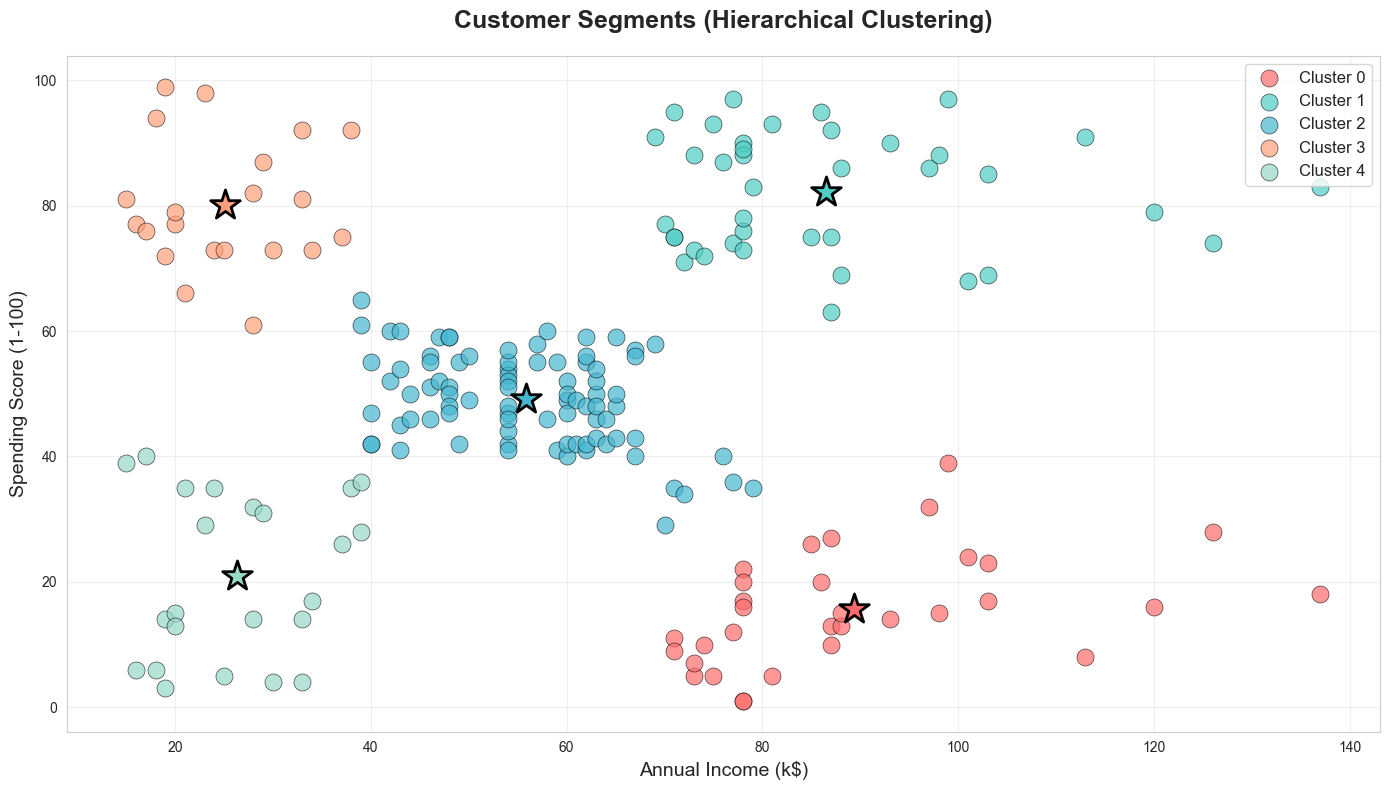


⭐ Stars represent cluster centers (mean values)
Each color represents a different customer segment!


In [16]:
# 2D Scatter Plot with Clusters
plt.figure(figsize=(14, 8))

# Define colors for clusters
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
cluster_names = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'Cluster 4']

# Plot each cluster
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    plt.scatter(cluster_data['Annual Income (k$)'], 
                cluster_data['Spending Score'],
                s=150, 
                c=colors[i], 
                label=cluster_names[i],
                alpha=0.7,
                edgecolors='black',
                linewidth=0.5)

# Calculate and plot cluster centers
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    center_x = cluster_data['Annual Income (k$)'].mean()
    center_y = cluster_data['Spending Score'].mean()
    plt.scatter(center_x, center_y, s=500, c=colors[i], marker='*', 
                edgecolors='black', linewidth=2, alpha=1)

plt.title('Customer Segments (Hierarchical Clustering)', fontsize=18, fontweight='bold', pad=20)
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(fontsize=12, loc='best')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n⭐ Stars represent cluster centers (mean values)")
print("Each color represents a different customer segment!")

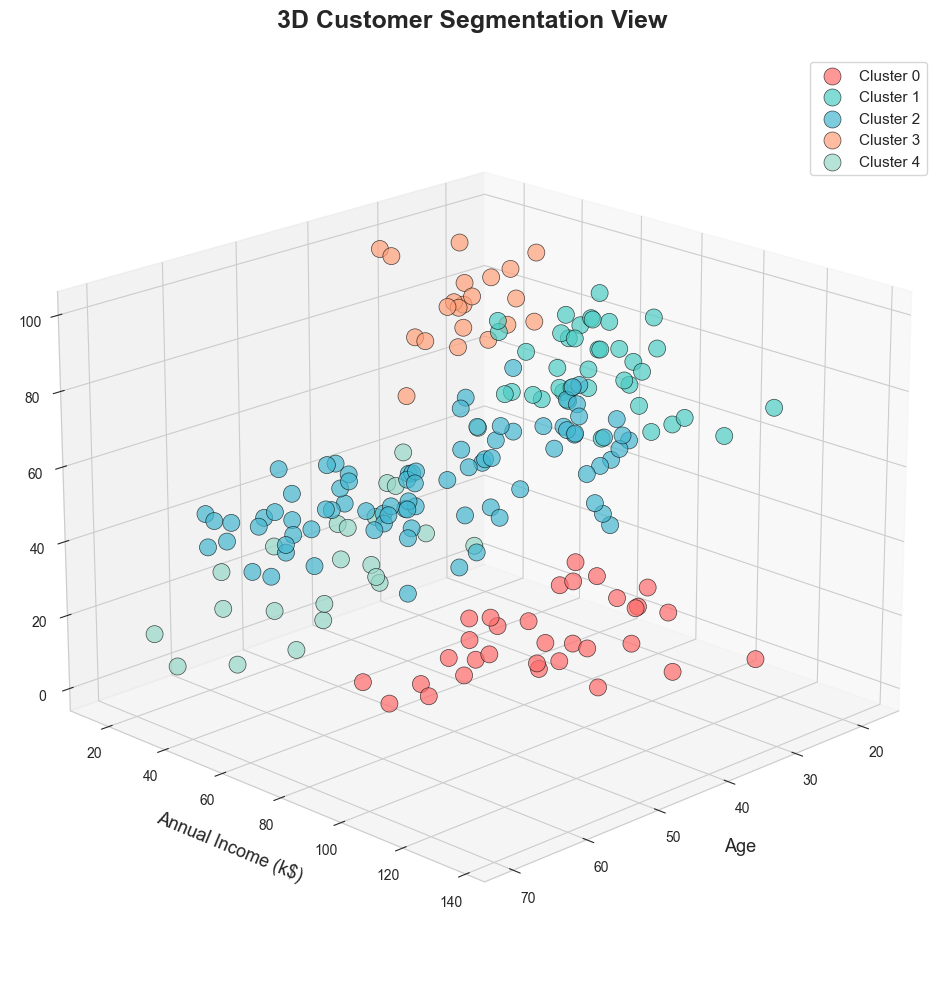


🎨 This 3D view shows how age also influences customer segments!


In [17]:
# 3D Visualization with Age, Income, and Spending Score
fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster in 3D
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    ax.scatter(cluster_data['Age'], 
               cluster_data['Annual Income (k$)'],
               cluster_data['Spending Score'],
               s=150,
               c=colors[i],
               label=cluster_names[i],
               alpha=0.7,
               edgecolors='black',
               linewidth=0.5)

ax.set_title('3D Customer Segmentation View', fontsize=18, fontweight='bold', pad=20)
ax.set_xlabel('Age', fontsize=13, labelpad=10)
ax.set_ylabel('Annual Income (k$)', fontsize=13, labelpad=10)
ax.set_zlabel('Spending Score', fontsize=13, labelpad=10)
ax.legend(fontsize=11)
ax.view_init(elev=20, azim=45)  # Adjust viewing angle
plt.tight_layout()
plt.show()

print("\n🎨 This 3D view shows how age also influences customer segments!")

---
## 📊 Step 8: Customer Segment Analysis

Let's analyze each cluster to understand the characteristics of each customer segment.

In [18]:
# Detailed analysis of each cluster
segment_analysis = df.groupby('Cluster').agg({
    'CustomerID': 'count',
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score': 'mean'
}).round(2)

segment_analysis.columns = ['Customer Count', 'Avg Age', 'Avg Income (k$)', 'Avg Spending Score']

print("\n" + "="*100)
print("📊 CUSTOMER SEGMENT ANALYSIS")
print("="*100)
print(segment_analysis)
print("="*100)


📊 CUSTOMER SEGMENT ANALYSIS
         Customer Count  Avg Age  Avg Income (k$)  Avg Spending Score
Cluster                                                              
0                    32    41.00            89.41               15.59
1                    39    32.69            86.54               82.13
2                    85    42.48            55.81               49.13
3                    21    25.33            25.10               80.05
4                    23    45.22            26.30               20.91


In [19]:
# Gender distribution in each cluster
gender_distribution = pd.crosstab(df['Cluster'], df['Gender'])

print("\n" + "="*80)
print("👥 Gender Distribution by Cluster")
print("="*80)
print(gender_distribution)
print("="*80)


👥 Gender Distribution by Cluster
Gender   Female  Male
Cluster              
0            14    18
1            21    18
2            51    34
3            12     9
4            14     9


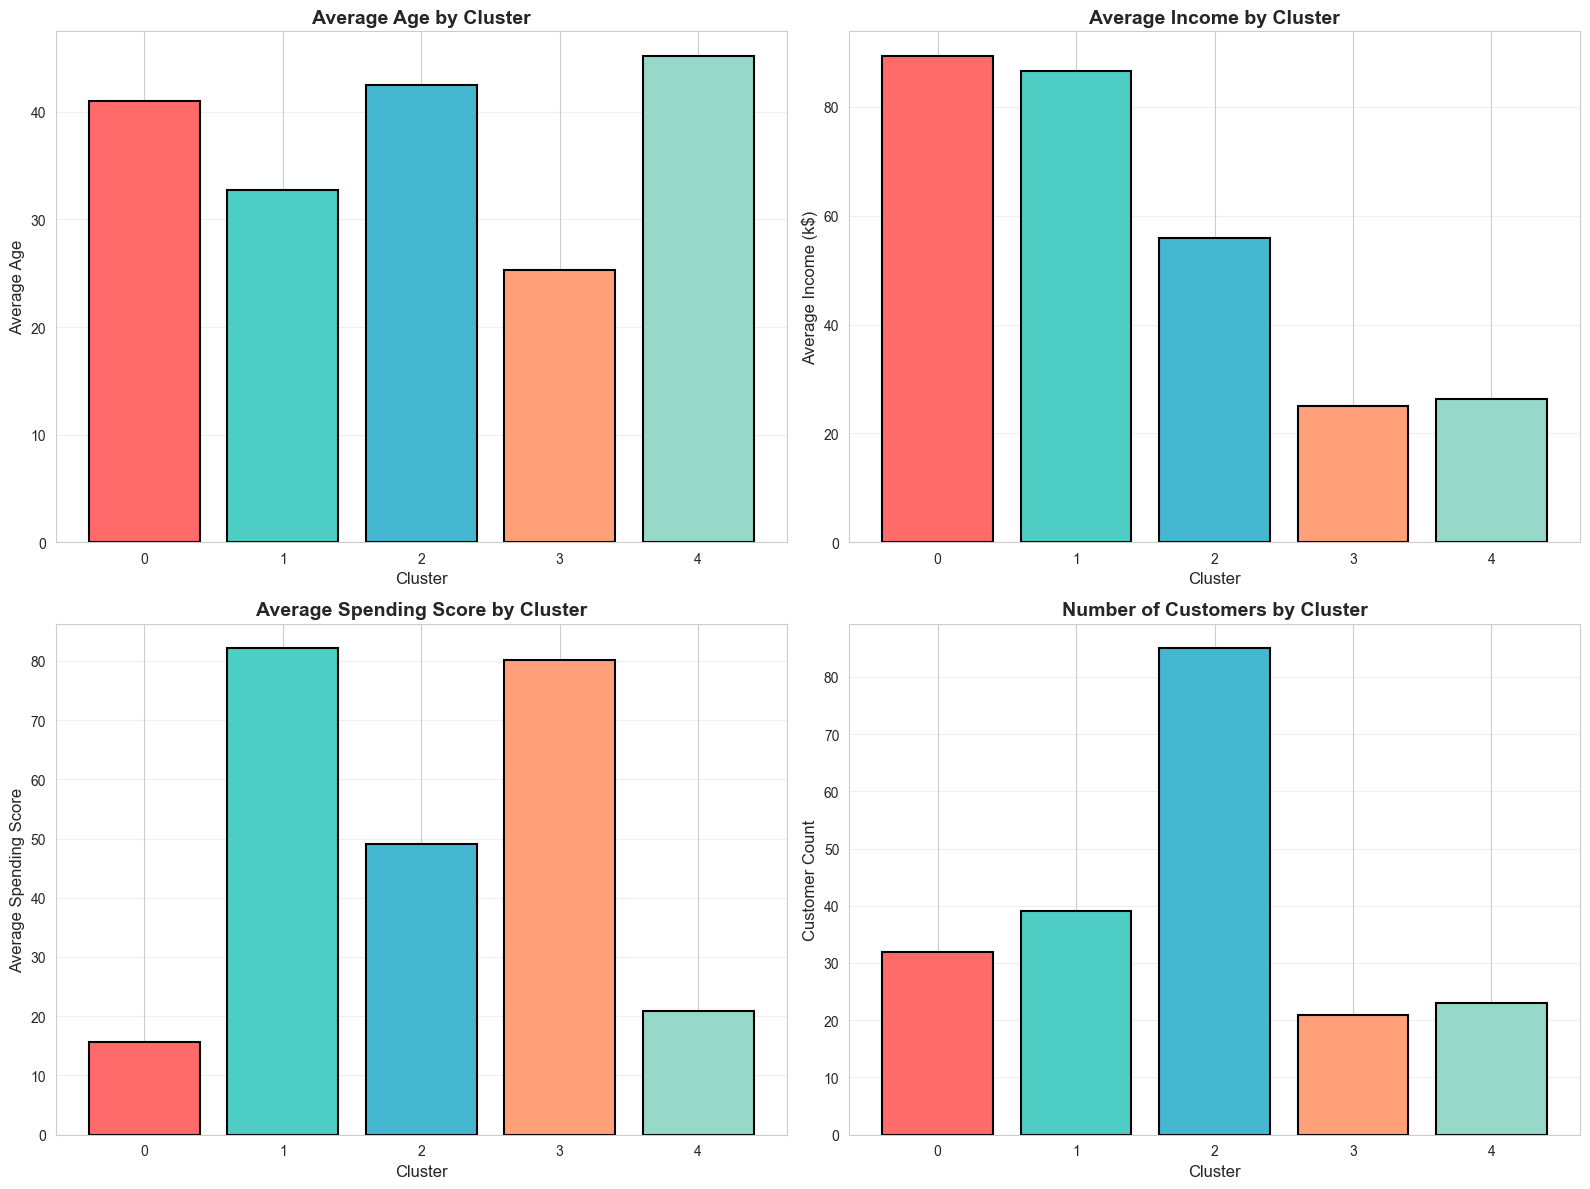

In [20]:
# Visualize cluster comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Average Age by Cluster
cluster_avg = df.groupby('Cluster')['Age'].mean()
axes[0, 0].bar(cluster_avg.index, cluster_avg.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0, 0].set_title('Average Age by Cluster', fontsize=14, fontweight='bold')
axes[0, 0].set_xlabel('Cluster', fontsize=12)
axes[0, 0].set_ylabel('Average Age', fontsize=12)
axes[0, 0].grid(axis='y', alpha=0.3)

# Average Income by Cluster
cluster_income = df.groupby('Cluster')['Annual Income (k$)'].mean()
axes[0, 1].bar(cluster_income.index, cluster_income.values, color=colors, edgecolor='black', linewidth=1.5)
axes[0, 1].set_title('Average Income by Cluster', fontsize=14, fontweight='bold')
axes[0, 1].set_xlabel('Cluster', fontsize=12)
axes[0, 1].set_ylabel('Average Income (k$)', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# Average Spending Score by Cluster
cluster_spending = df.groupby('Cluster')['Spending Score'].mean()
axes[1, 0].bar(cluster_spending.index, cluster_spending.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1, 0].set_title('Average Spending Score by Cluster', fontsize=14, fontweight='bold')
axes[1, 0].set_xlabel('Cluster', fontsize=12)
axes[1, 0].set_ylabel('Average Spending Score', fontsize=12)
axes[1, 0].grid(axis='y', alpha=0.3)

# Customer Count by Cluster
cluster_count = df['Cluster'].value_counts().sort_index()
axes[1, 1].bar(cluster_count.index, cluster_count.values, color=colors, edgecolor='black', linewidth=1.5)
axes[1, 1].set_title('Number of Customers by Cluster', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('Cluster', fontsize=12)
axes[1, 1].set_ylabel('Customer Count', fontsize=12)
axes[1, 1].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

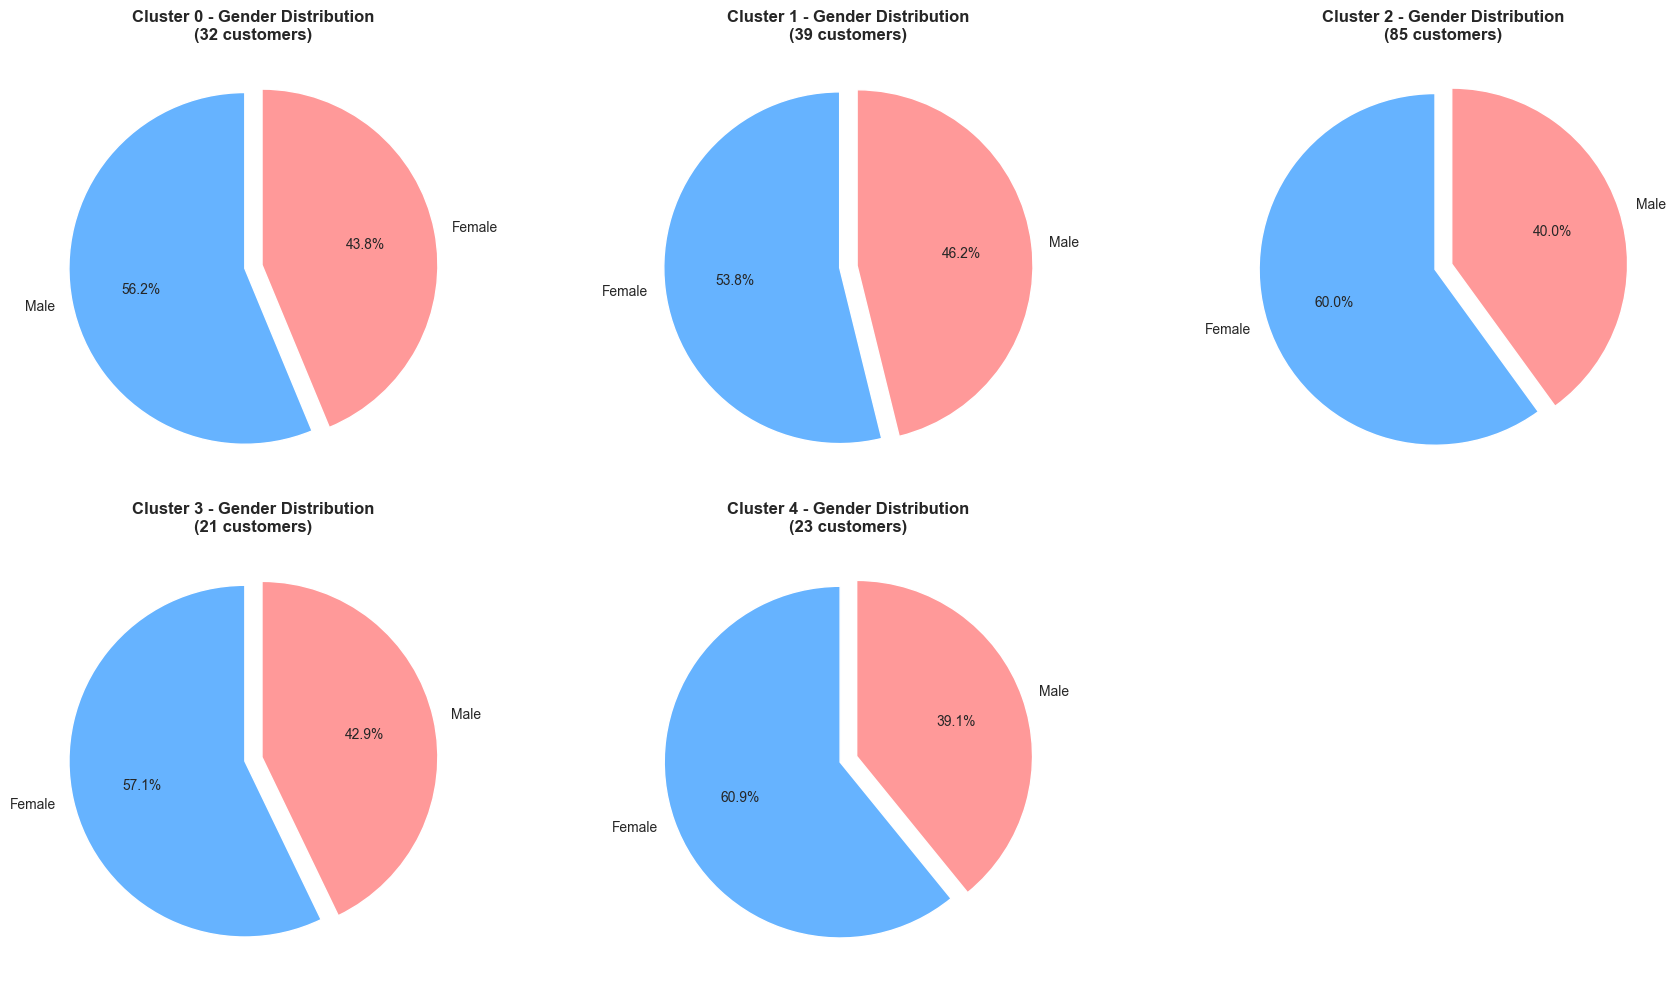

In [21]:
# Gender distribution pie charts for each cluster
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i in range(n_clusters):
    cluster_gender = df[df['Cluster'] == i]['Gender'].value_counts()
    axes[i].pie(cluster_gender, labels=cluster_gender.index, autopct='%1.1f%%',
                startangle=90, colors=['#66b3ff', '#ff9999'], explode=(0.05, 0.05))
    axes[i].set_title(f'Cluster {i} - Gender Distribution\n({len(df[df["Cluster"]==i])} customers)',
                      fontsize=12, fontweight='bold')

# Remove extra subplot
fig.delaxes(axes[5])

plt.tight_layout()
plt.show()

---
## 💼 Step 9: Business Insights & Segment Names

Let's give meaningful names to each cluster based on their characteristics.

In [22]:
# Assign descriptive names to clusters based on their characteristics
# Analyze the segment_analysis dataframe to create meaningful names

segment_names = {}
business_insights = {}

# Analyze each cluster and assign names
for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    avg_income = cluster_data['Annual Income (k$)'].mean()
    avg_spending = cluster_data['Spending Score'].mean()
    
    # Determine segment name based on income and spending patterns
    if avg_income < 45 and avg_spending > 60:
        segment_names[i] = "🎯 Careful Spenders (Low Income, High Spending)"
        business_insights[i] = "Target with affordable luxury products and payment plans."
    elif avg_income < 45 and avg_spending < 40:
        segment_names[i] = "💰 Budget Shoppers (Low Income, Low Spending)"
        business_insights[i] = "Offer discounts, promotions, and budget-friendly options."
    elif avg_income > 65 and avg_spending > 60:
        segment_names[i] = "👑 Premium Customers (High Income, High Spending)"
        business_insights[i] = "Provide premium products, VIP services, and exclusive offers."
    elif avg_income > 65 and avg_spending < 40:
        segment_names[i] = "🎓 Sensible Shoppers (High Income, Low Spending)"
        business_insights[i] = "Focus on quality, value, and long-term benefits."
    else:
        segment_names[i] = "⚖️ Average Customers (Medium Income, Medium Spending)"
        business_insights[i] = "Standard promotions and balanced product offerings."

print("\n" + "="*100)
print("💼 CUSTOMER SEGMENT PROFILES & BUSINESS INSIGHTS")
print("="*100)

for i in range(n_clusters):
    cluster_data = df[df['Cluster'] == i]
    print(f"\n{'='*100}")
    print(f"CLUSTER {i}: {segment_names[i]}")
    print(f"{'='*100}")
    print(f"📊 Customer Count: {len(cluster_data)}")
    print(f"👤 Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"💵 Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"🛒 Average Spending Score: {cluster_data['Spending Score'].mean():.1f}")
    print(f"👥 Gender: {cluster_data['Gender'].value_counts().to_dict()}")
    print(f"\n💡 Marketing Strategy: {business_insights[i]}")
    print(f"{'='*100}")

print("\n" + "="*100)


💼 CUSTOMER SEGMENT PROFILES & BUSINESS INSIGHTS

CLUSTER 0: 🎓 Sensible Shoppers (High Income, Low Spending)
📊 Customer Count: 32
👤 Average Age: 41.0 years
💵 Average Income: $89.4k
🛒 Average Spending Score: 15.6
👥 Gender: {'Male': 18, 'Female': 14}

💡 Marketing Strategy: Focus on quality, value, and long-term benefits.

CLUSTER 1: 👑 Premium Customers (High Income, High Spending)
📊 Customer Count: 39
👤 Average Age: 32.7 years
💵 Average Income: $86.5k
🛒 Average Spending Score: 82.1
👥 Gender: {'Female': 21, 'Male': 18}

💡 Marketing Strategy: Provide premium products, VIP services, and exclusive offers.

CLUSTER 2: ⚖️ Average Customers (Medium Income, Medium Spending)
📊 Customer Count: 85
👤 Average Age: 42.5 years
💵 Average Income: $55.8k
🛒 Average Spending Score: 49.1
👥 Gender: {'Female': 51, 'Male': 34}

💡 Marketing Strategy: Standard promotions and balanced product offerings.

CLUSTER 3: 🎯 Careful Spenders (Low Income, High Spending)
📊 Customer Count: 21
👤 Average Age: 25.3 years
💵 Aver

---
## 📋 Step 10: Final Summary & Recommendations

Let's create a comprehensive summary of our analysis.

In [23]:
# Create comprehensive summary table
summary_df = pd.DataFrame({
    'Cluster': list(range(n_clusters)),
    'Segment Name': [segment_names[i] for i in range(n_clusters)],
    'Customers': [len(df[df['Cluster'] == i]) for i in range(n_clusters)],
    'Avg Income': [f"${df[df['Cluster'] == i]['Annual Income (k$)'].mean():.1f}k" for i in range(n_clusters)],
    'Avg Spending': [f"{df[df['Cluster'] == i]['Spending Score'].mean():.1f}" for i in range(n_clusters)],
    'Strategy': [business_insights[i] for i in range(n_clusters)]
})

print("\n" + "="*150)
print("📊 FINAL CUSTOMER SEGMENTATION SUMMARY")
print("="*150)
print(summary_df.to_string(index=False))
print("="*150)


📊 FINAL CUSTOMER SEGMENTATION SUMMARY
 Cluster                                          Segment Name  Customers Avg Income Avg Spending                                                      Strategy
       0       🎓 Sensible Shoppers (High Income, Low Spending)         32     $89.4k         15.6              Focus on quality, value, and long-term benefits.
       1      👑 Premium Customers (High Income, High Spending)         39     $86.5k         82.1 Provide premium products, VIP services, and exclusive offers.
       2 ⚖️ Average Customers (Medium Income, Medium Spending)         85     $55.8k         49.1           Standard promotions and balanced product offerings.
       3        🎯 Careful Spenders (Low Income, High Spending)         21     $25.1k         80.0     Target with affordable luxury products and payment plans.
       4          💰 Budget Shoppers (Low Income, Low Spending)         23     $26.3k         20.9     Offer discounts, promotions, and budget-friendly options.


In [24]:
# Save the results to a new CSV file
df.to_csv('Customer_Segments_Results.csv', index=False)
print("\n✅ Results saved to 'Customer_Segments_Results.csv'")
print("\nYou can now use this file to:")
print("   • Import into CRM systems")
print("   • Create targeted marketing campaigns")
print("   • Analyze customer behavior further")
print("   • Share insights with your team")


✅ Results saved to 'Customer_Segments_Results.csv'

You can now use this file to:
   • Import into CRM systems
   • Create targeted marketing campaigns
   • Analyze customer behavior further
   • Share insights with your team


---
## 🎓 Key Learnings & Takeaways

### What We Accomplished:
1. ✅ Loaded and explored customer data
2. ✅ Visualized data distributions and relationships
3. ✅ Applied Hierarchical Clustering to segment customers
4. ✅ Created dendrograms to determine optimal clusters
5. ✅ Generated 2D and 3D visualizations of customer segments
6. ✅ Analyzed each segment's characteristics
7. ✅ Developed targeted marketing strategies

### Business Value:
- 🎯 **Targeted Marketing**: Create campaigns for specific customer groups
- 💰 **Revenue Optimization**: Focus on high-value segments
- 📈 **Customer Retention**: Understand different customer needs
- 🚀 **Growth Strategy**: Identify opportunities to convert low spenders

### Next Steps:
1. Test marketing strategies on each segment
2. Monitor segment movement over time
3. Combine with other data (purchase history, demographics)
4. A/B test different approaches for each segment

---

## 🎉 Congratulations!

You've successfully completed a Customer Spend Analysis using Hierarchical Clustering! 

You now understand:
- How to apply unsupervised learning to business problems
- How to interpret dendrograms and clustering results
- How to derive actionable insights from data

**Keep learning and experimenting with data science! 🚀**